## Model Test

In [1]:
import torch
import torchvision.transforms as transforms               # include image preprocess tools
from torchvision.datasets import CIFAR10        # for loading images from Pytorch CIFAR
from torch.utils.data import DataLoader
import detectors
import timm
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter
from src.temperature_scaling import ModelWithTemperature

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("vgg16_bn_cifar10", pretrained=True)
model = model.to(device)

# reprocess the images from CIFAR
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

C:\Users\jiayang\anaconda3\envs\pytorch2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified
Before temperature - NLL: 0.416, ECE: 0.062
Optimal temperature: 4.903
After temperature - NLL: 0.917, ECE: 0.470


ModelWithTemperature(
  (model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, pa

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4931 ± 0.0031
Final Average Prediction Set Size: 1.40 ± 0.02
Final Average Coverage: 0.9493 ± 0.0030
Final Average Real Probability: 0.9219 ± 0.0030


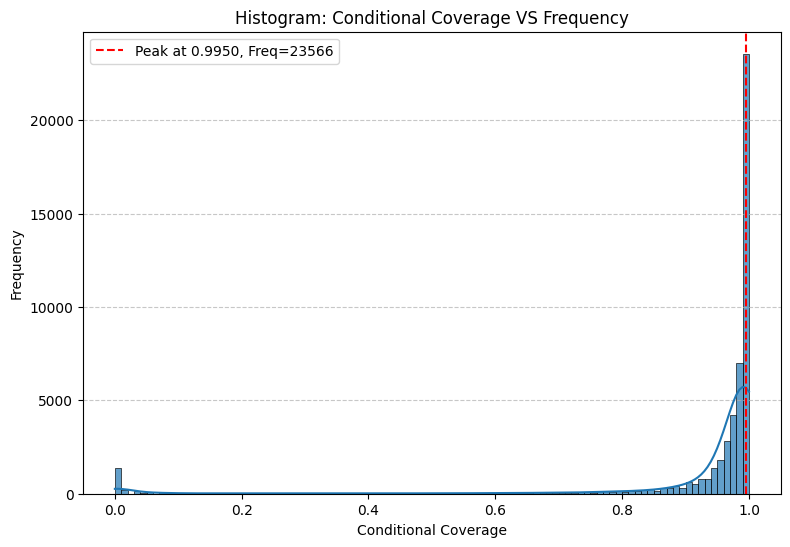

23566 (47.13%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4956 ± 0.0028
Final Average Prediction Set Size: 1.41 ± 0.02
Final Average Coverage: 0.9497 ± 0.0029
Final Average Real Probability: 0.9220 ± 0.0028


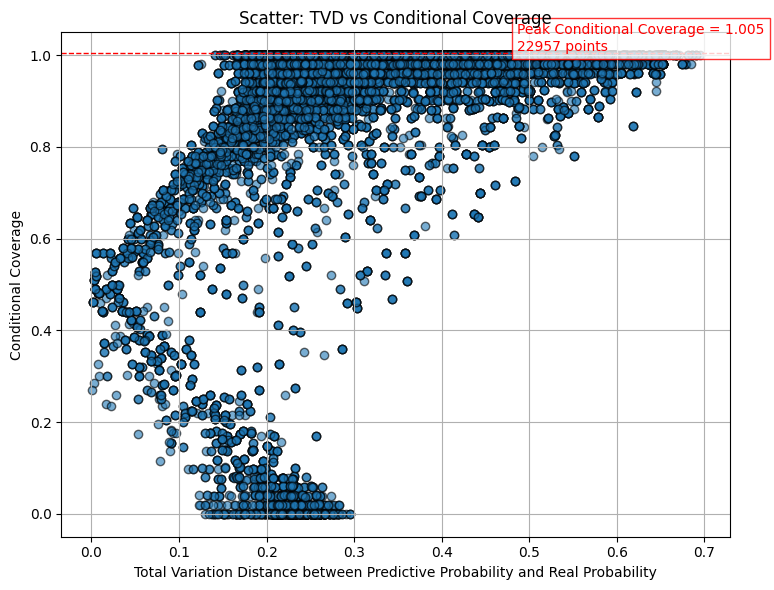

Peak Conditional Coverage = 1.005, with 22957 samples

=== Count Regions Summary ===
42759 (85.5%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
1412 (2.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
3232 (6.5%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.32278', '0.15461', '0.08755']
  Real Probability Set      : ['0.00000', '0.03922', '0.01961']
Sample 2:
  Predictive Probability Set: ['0.44201']
  Real Probability Set      : ['0.04082']
Sample 3:
  Predictive Probability Set: ['0.43131']
  Real Probability Set      : ['0.01923']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.26049', '0.14694', '0.09925']
  Real Probability Set      : ['0.00000', '0.50877', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.36836', '0.13334']

In [2]:
aps_cifar10h_scatter(model, dataset, device, num_runs=10, alpha=0.05)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5134 ± 0.0048
Final Average Prediction Set Size: 1.30 ± 0.03
Final Average Coverage: 0.9510 ± 0.0036
Final Average Real Probability: 0.9222 ± 0.0042


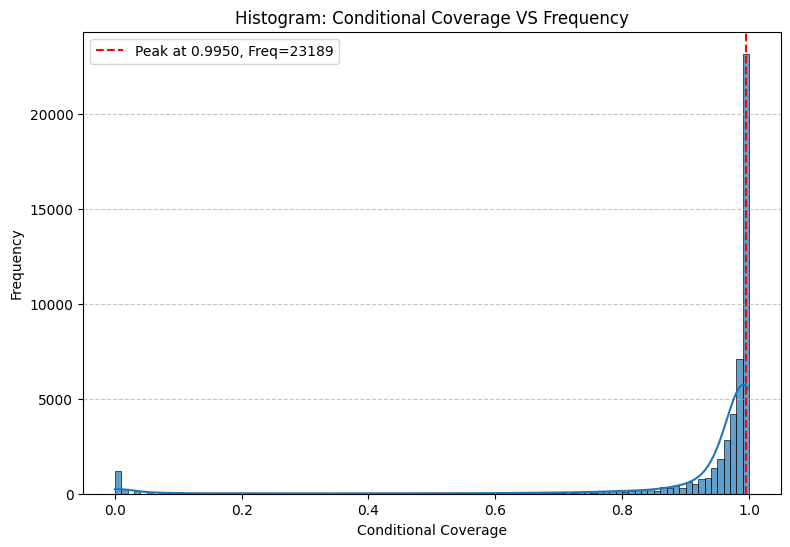

23189 (46.38%) samples reached the peak conditional coverage at 0.9950


In [13]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.03, k_reg=1, num_runs=10, alpha=0.05, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5074 ± 0.0041
Final Average Prediction Set Size: 1.28 ± 0.03
Final Average Coverage: 0.9503 ± 0.0026
Final Average Real Probability: 0.9212 ± 0.0029


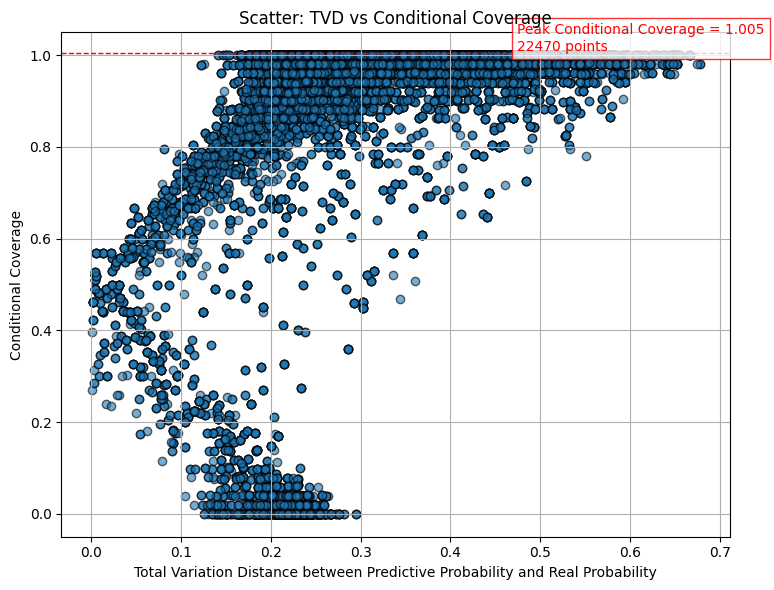

Peak Conditional Coverage = 1.005, with 22470 samples

=== Count Regions Summary ===
43531 (87.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
1077 (2.2%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
3650 (7.3%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.30695', '0.13073']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.48425']
  Real Probability Set      : ['0.01923']
Sample 3:
  Predictive Probability Set: ['0.49100']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.25843', '0.14490']
  Real Probability Set      : ['0.00000', '0.71429']
Sample 2:
  Predictive Probability Set: ['0.31856', '0.12100']
  Real Probability Set      : ['0.02041', '

In [3]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.03, k_reg=1, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5527 ± 0.0070
Final Average Prediction Set Size: 1.27 ± 0.02
Final Average Coverage: 0.9520 ± 0.0032
Final Average Real Probability: 0.9233 ± 0.0033


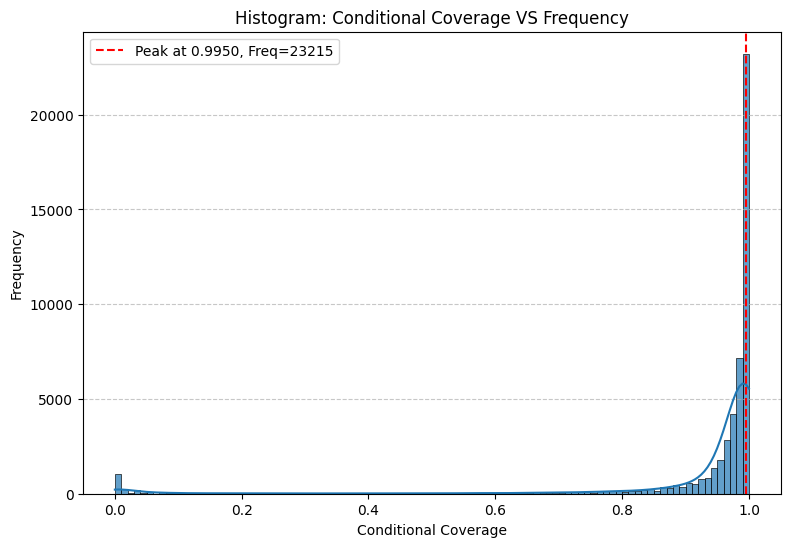

23215 (46.43%) samples reached the peak conditional coverage at 0.9950


In [15]:
saps_cifar10h_hist(model, dataset, device, lambda_=0.35, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5434 ± 0.0072
Final Average Prediction Set Size: 1.25 ± 0.02
Final Average Coverage: 0.9519 ± 0.0039
Final Average Real Probability: 0.9228 ± 0.0039


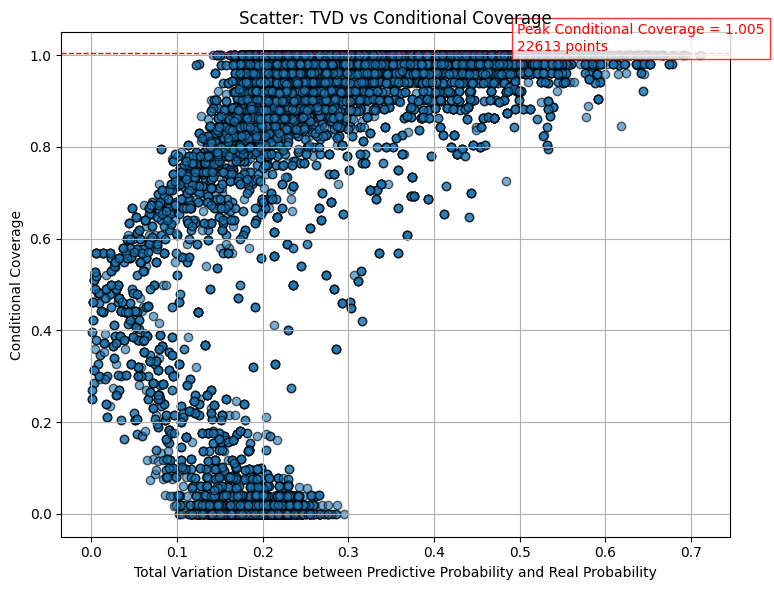

Peak Conditional Coverage = 1.005, with 22613 samples

=== Count Regions Summary ===
44038 (88.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
723 (1.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
4023 (8.0%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.45665']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.26247', '0.19039']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.19060', '0.18339', '0.13617']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.34173', '0.13395']
  Real Probability Set      : ['0.03922', '0.56863']
Sample 2:
  Predictive Probability Set: ['0.34173', '0.13395']


In [4]:
saps_cifar10h_scatter(model, dataset, device, lambda_=0.35, num_runs=10, alpha=0.05)